In [2086]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

# Zadanie 1
Use the head and describe function to examine the data and display few columns.

In [2087]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2088]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# Zadanie 2
Extract data from pandas structure to new variables of ndarray type and plot the data, where: x - population, y - profit.

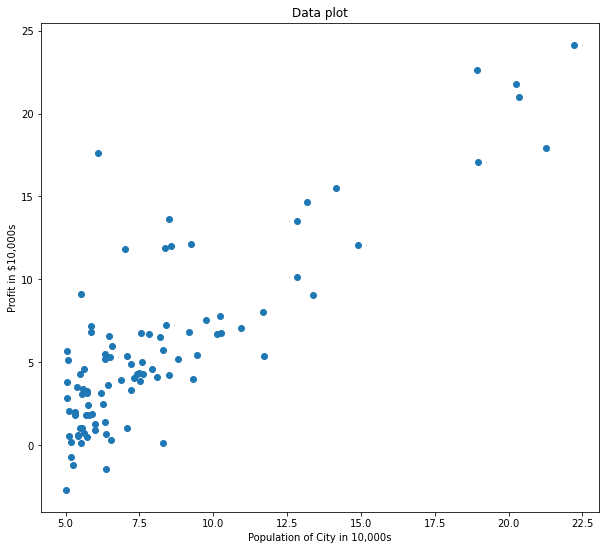

In [2089]:
# population
x = data.values[:, 0]

# profit
y = data.values[:, 1]

plt.figure(figsize =(10,9))
plt.scatter(x, y)
plt.title('Data plot')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# Zadanie 3
In order to make the cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the top of x.

In [2090]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)

# Zadanie 4
We need to separate our data into independent variables X and our dependent variable y. We also need to initialise parameter θ.


In [2091]:
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

# Zadanie 5
The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X, y and parameter θ.

In [2092]:
def computeCost(X, y, theta):
    # 2-3 code lines as series of matrix operation
    m = X.shape[1]
    return 1/(2*m) * np.sum(((theta.T @ X - y))**2)

# Zadanie 6
Test the cost function with (θ = 0).
Output: 32.07 (may differ…)

In [2093]:
# założenia
# X.shape =  [n+1, m]
# y.shape = [1, m]
# theta.shape = [n+1, 1]

print(f'Output: {computeCost(X, y, theta)}')

Output: 32.072733877455676


# Zadanie 7
Please implement the gradient descent algorithm:
 - the function returns optimized values θ and a vector of the cost function value for each iteration

In [2094]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = []
    m = X.shape[1]
    for _ in range(it):
        theta0_temp  = theta[0,0] - alpha * 1/m * np.sum((theta.T @ X - y))
        theta1_temp = theta[1,0] - alpha * 1/m * np.sum((theta.T @ X - y) @ X[1,:])
        theta[0,0] = theta0_temp 
        theta[1,0] = theta1_temp
        cost.append(computeCost(X,y,theta))
        
    return theta,cost

alpha = 0.01
it = 1000


# Zadanie 8
Please calculate the optimal parameters for the dataset.

In [2095]:
theta, cost = simple_gradient(X, y, theta, alpha, it)

# Zadanie 9
Please calculate the cost function for the given θ (Ex.8).

In [2096]:
print(f'Cost function: {computeCost(X,y,theta)}')

Cost function: 4.515955615224579


# Zadanie 10
Plot the regression function and our dataset.

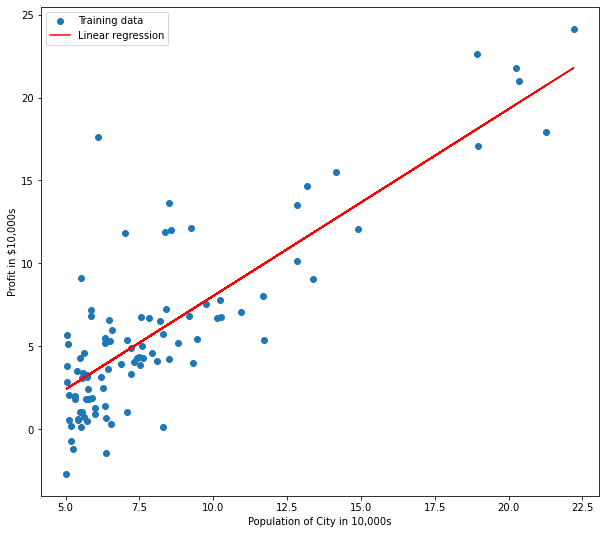

In [2097]:
plt.figure(figsize =(10,9))
plt.scatter(x, y)
plt.plot(X[1], theta[0,0] + theta[1,0] * X[1],'r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(['Training data', 'Linear regression'])
plt.show()

# Zadanie 11
Plot the relationship between the cost function and number of iterations.

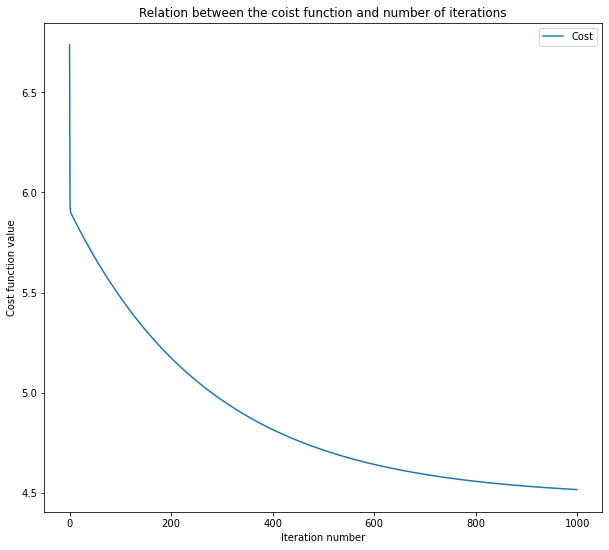

In [2098]:
plt.figure(figsize =(10,9))
plt.plot(cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.legend(['Cost'])
plt.title('Relation between the coist function and number of iterations')
plt.show()

# Zadanie 1
Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [2099]:
# Wczytanie danych
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2100]:
# Normalizacja
med = data2.mean()
norm_data2 = (data2 - med) /np.std(data2)
norm_data2.head()

,Size,Bedrooms,Price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


# Zadanie 2
Please perform steps 3-11 from the previous task by using the same functions.

In [2101]:
# Dodanie wartości 1
norm_data2.insert(0, 'Additional row', [1]*data2.shape[0])
norm_data2.head()

,Additional row,Size,Bedrooms,Price
0,1,0.131415,-0.226093,0.480890
1,1,-0.509641,-0.226093,-0.084983
2,1,0.507909,-0.226093,0.231097
3,1,-0.743677,-1.554392,-0.876398
4,1,1.271071,1.102205,1.612637


In [2102]:
# Nadanie odpowiedniej formy danym oraz inicjalizacja thety
X = np.matrix(norm_data2[['Additional row','Size','Bedrooms']].values)
y = np.matrix(norm_data2[['Price']].values)
theta = np.zeros((3, 1))


In [2103]:
# Wyliczeie kosztu oraz poprawienie funkcji computeCost
def computeCost(X_comp, y_comp, theta_comp):
    m = X_comp.shape[0]
    return  1 / (2*m) * np.sum(np.power(X_comp * theta_comp - y_comp, 2)) 
    
print(f'Output: {computeCost(X, y, theta)}')

Output: 0.5000000000000001


In [2104]:
# Poprawienie funkcji simple_gradient oraz wyliczenie parametrów optymalnych
def simple_gradient(X_sg, y_sg, theta_sg, alpha_sg, it):
    # it - number of iterations
    cost_sg = []
    m = X.shape[0]

    for _ in range(it):
        theta_sg = theta_sg - alpha_sg * X_sg.T * (X_sg * theta_sg - y_sg) * (1/m)
        cost_sg.append(computeCost(X_sg, y_sg, theta_sg))

    return theta_sg, cost_sg

alpha = 0.01
it = 1000

theta, cost  = simple_gradient(X, y, theta, alpha, it)

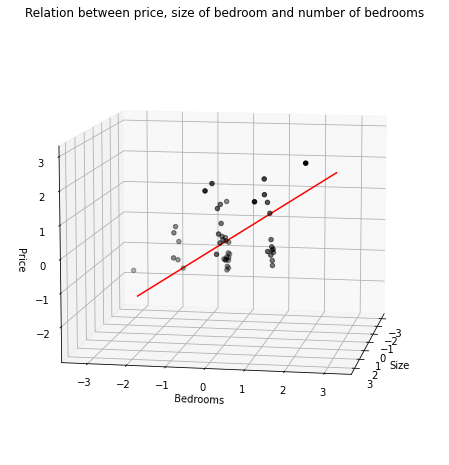

In [2105]:
# Wykres z regresją dla obu zmiennych
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=((8,8)))

area = np.linspace(-3.2, 3.2, 50)

ax = fig.add_subplot(111,projection='3d')
ax.plot(area, area, theta.flat[0] + theta.flat[1] * area + theta.flat[2] * area, 'r')
ax.scatter(norm_data2['Size'], norm_data2['Bedrooms'], norm_data2['Price'], color='k')
x = norm_data2[['Bedrooms', 'Size']]
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(10, 10)
ax.set_title('Relation between price, size of bedroom and number of bedrooms')
plt.show()

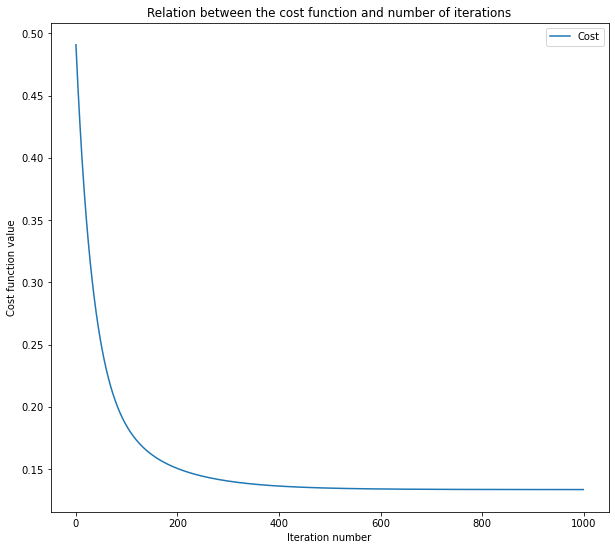

In [2106]:
# Zależność kosztu od liczby iteracji
plt.figure(figsize =(10,9))
plt.plot(cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.legend(['Cost'])
plt.title('Relation between the cost function and number of iterations')
plt.show()

# Linear regression - Python packages

In [2107]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import
iris = datasets.load_iris()
data3 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2108]:
# Normalization
norm_data3 = (data3-data3.mean())/data3.std()
norm_data3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,-1.220656
1,-1.139200,-0.131539,-1.335752,-1.311052,-1.220656
2,-1.380727,0.327318,-1.392399,-1.311052,-1.220656
3,-1.501490,0.097889,-1.279104,-1.311052,-1.220656
4,-1.018437,1.245030,-1.335752,-1.311052,-1.220656


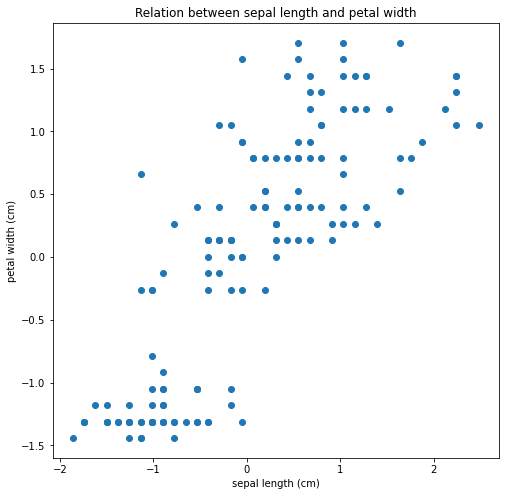

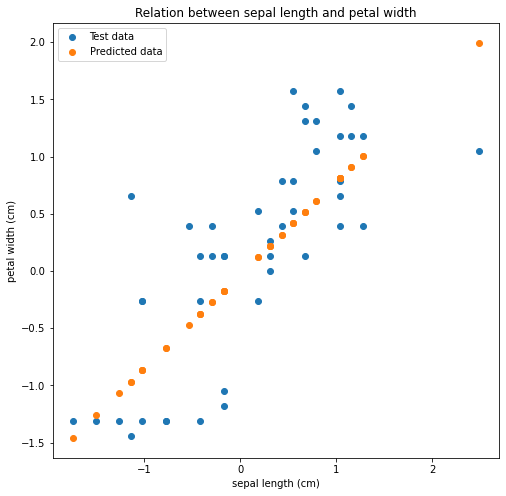

Coefficients: 
 [[0.81759771]]
Intercept: 
 [-0.03505547]
Residual sum of squares: petal width (cm)    0.359257
dtype: float64


c:\Users\Julia\Desktop\Uczenie Maszynowe\.conda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


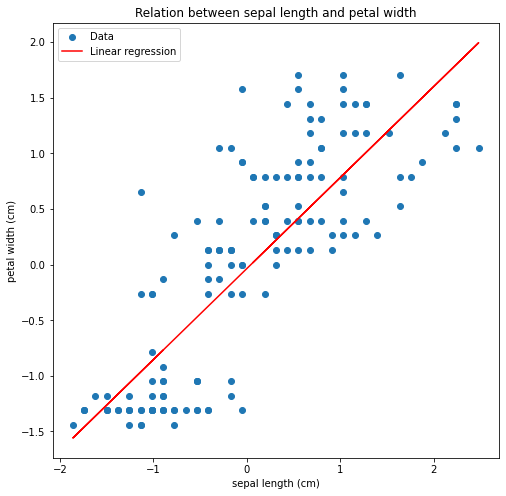

In [2109]:
# Linear Regression
x = norm_data3[['sepal length (cm)']]
y = norm_data3[['petal width (cm)']]

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, train_size=0.7)

# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)

# Predicting values using test data
Y_predicted = regr.predict(X_test)
 

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_predicted)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Test data','Predicted data'])
plt.show()

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.plot(x, x*regr.coef_ + regr.intercept_, 'r')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Data','Linear regression'])
plt.show()

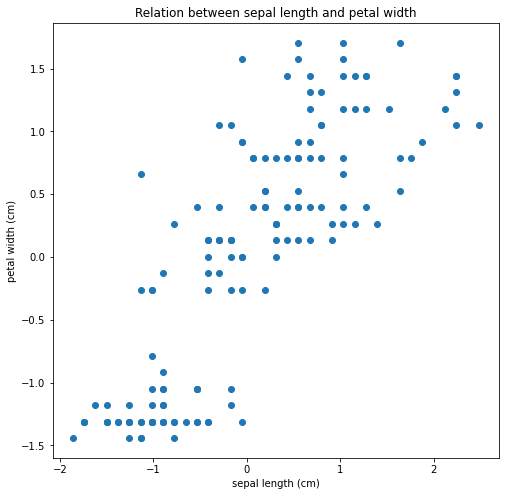

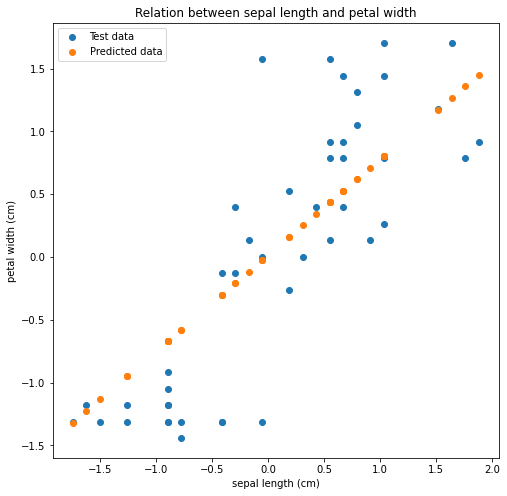

Coefficients: 
 [[0.76443878]]
Intercept: 
 [0.01366887]
Residual sum of squares: petal width (cm)    0.361413
dtype: float64


c:\Users\Julia\Desktop\Uczenie Maszynowe\.conda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


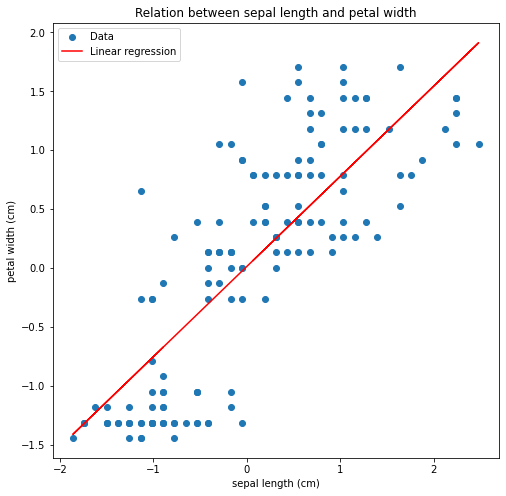

In [2110]:
# Ridge

x = norm_data3[['sepal length (cm)']]
y = norm_data3[['petal width (cm)']]

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, train_size=0.7)

# Creating an object 
regr = linear_model.Ridge(alpha = 1)
 
# Learning model on training data
regr.fit(X_train, Y_train)

# Predicting values using test data
Y_predicted = regr.predict(X_test)
 

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_predicted)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Test data','Predicted data'])
plt.show()

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.plot(x, x*regr.coef_ + regr.intercept_, 'r')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Data','Linear regression'])
plt.show()

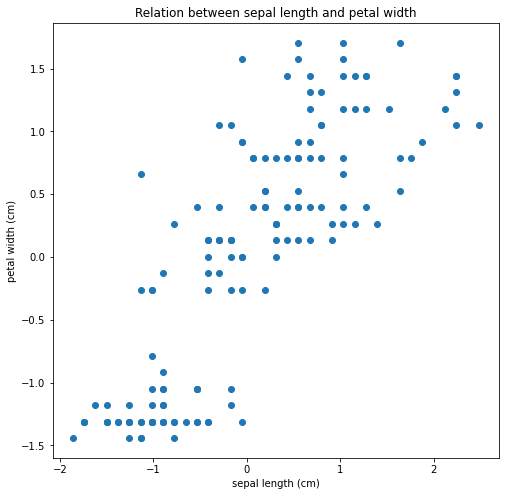

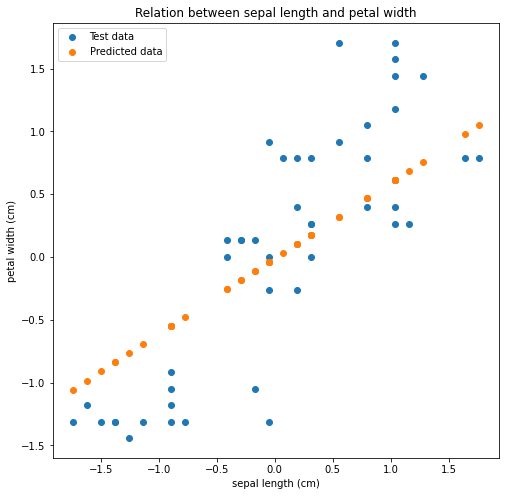

Coefficients: 
 [0.60115778]
Intercept: 
 [-0.00949132]
Residual sum of squares: petal width (cm)    0.35565
dtype: float64


c:\Users\Julia\Desktop\Uczenie Maszynowe\.conda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


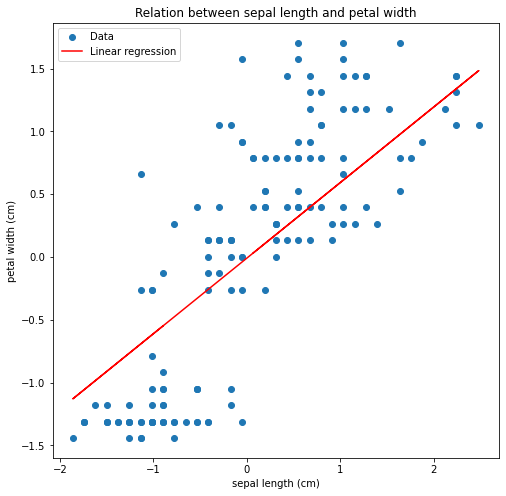

In [2111]:
# Lasso

x = norm_data3[['sepal length (cm)']]
y = norm_data3[['petal width (cm)']]

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, train_size=0.7)

# Creating an object 
regr = linear_model.Lasso(alpha = 0.2)
 
# Learning model on training data
regr.fit(X_train, Y_train)

# Predicting values using test data
Y_predicted = regr.predict(X_test)
 

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_predicted)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Test data','Predicted data'])
plt.show()

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test).reshape(45,1) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.plot(x, x*regr.coef_ + regr.intercept_, 'r')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Data','Linear regression'])
plt.show()

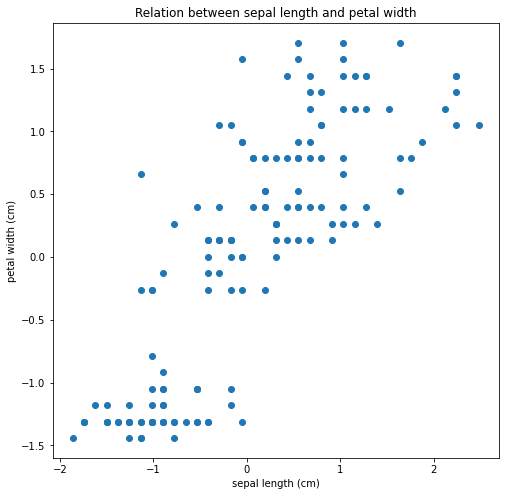

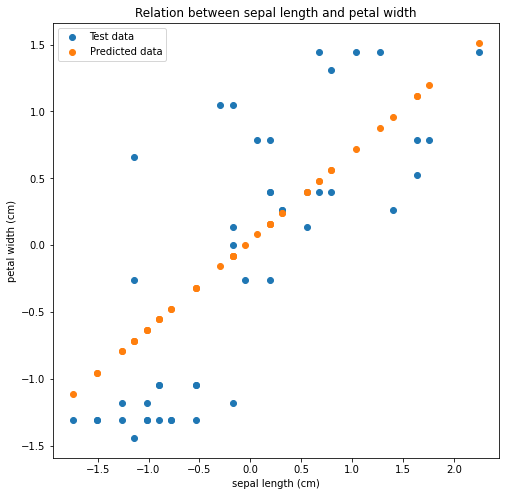

Coefficients: 
 [0.65911931]
Intercept: 
 [0.03594443]
Residual sum of squares: petal width (cm)    0.396802
dtype: float64


c:\Users\Julia\Desktop\Uczenie Maszynowe\.conda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


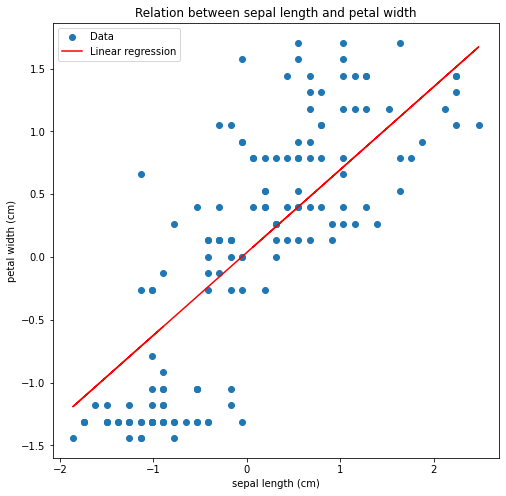

In [2112]:
# ElNet

x = norm_data3[['sepal length (cm)']]
y = norm_data3[['petal width (cm)']]

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, train_size=0.7)

# Creating an object 
regr = linear_model.ElasticNet(alpha = 0.2, l1_ratio=0.5)
 
# Learning model on training data
regr.fit(X_train, Y_train)

# Predicting values using test data
Y_predicted = regr.predict(X_test)
 

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_predicted)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Test data','Predicted data'])
plt.show()

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test).reshape(45,1) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

plt.figure(figsize=(8,8))
plt.title('Relation between sepal length and petal width')
plt.scatter(x, y)
plt.plot(x, x*regr.coef_ + regr.intercept_, 'r')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['Data','Linear regression'])
plt.show()